In [2]:
#import libraries
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [9]:
#function that creates the data
def createData(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x+torch.randn(N,1)/2
    return x,y

In [11]:
#function that builds and trains the model

def model(x,y):
    
    #Building the model
    ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
    )

    #Parameters
    learningRate = .05     #learning rate
    lossfun = nn.MSELoss()    #loss function
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate) #optimizer (type of gradient descent to implement)
    
    #More parameters
    numepochs = 500
    losses = torch.zeros(numepochs)

    ## Train the model this time for real lol
    #Training loop
    for epoch_idx in range(numepochs):
        #forward pass
        yHat = ANNreg(x)

        #compute loss
        loss = lossfun(yHat,y)
        losses[epoch_idx] = loss

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #Finish  training loop

    #Compute model predictions
    predictions = ANNreg(x)

    #output:
    return predictions, losses



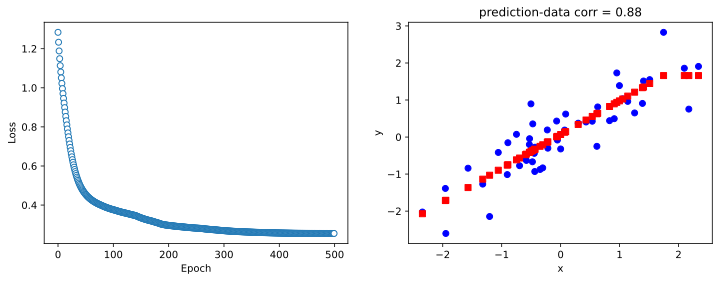

In [26]:
#Testing

x,y = createData(.8)

#run the model
yHat, losses = model(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(x,y,'bo', label='Real data')
ax[1].plot(x,yHat.detach().numpy(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
plt.show()


In [28]:
#The slopes to stimulate
slopes = np.linspace(-2,2,21)

numExps = 50

#initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slope_idx in range(len(slopes)):

    for N in range(numExps):
        # create a dataset and run the model
        x,y = createData(slopes[slope_idx])
        yHat, losses = model(x,y)

        #store the final loss and performance
        results[slope_idx,N,0] = losses[-1]
        results[slope_idx,N,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]

#Correlation can be 0 if the model didn't do well. Set nan's ->0
results[np.isnan(results)] = 0

/home/carlos/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/carlos/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


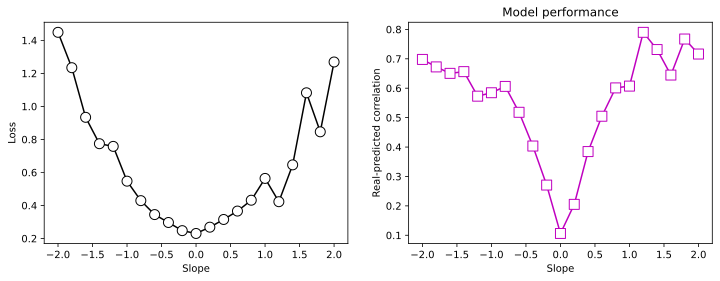

In [30]:
#plot

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')
plt.show()


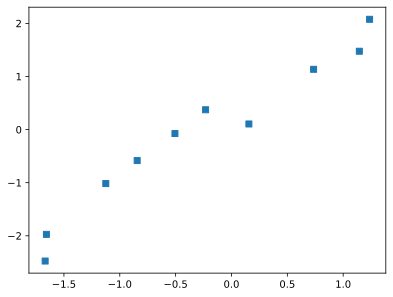

In [2]:
#Create data

N = 10
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

#plot

plt.plot(x,y,'s')
plt.show()

In [3]:
#Build model

ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
#learning rate
learningRate = .05

#loss function
lossfun = nn.MSELoss()

#optimizer (type of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [5]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

## Train the model this time for real lol

for epoch_idx in range(numepochs):
    #forward pass
    yHat = ANNreg(x)

    #compute loss
    loss = lossfun(yHat,y)
    losses[epoch_idx] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

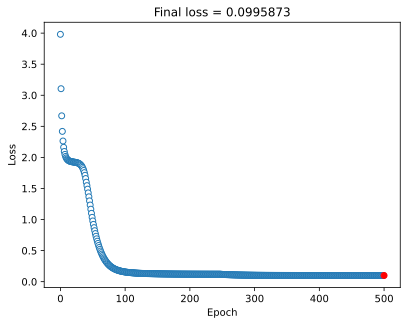

In [6]:
#Show the losses

#Manually compute losses
#final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o', markerfacecolor='w', linewidth=.1)
plt.plot(numepochs, testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [7]:
testloss

tensor(0.0996, grad_fn=<MeanBackward0>)

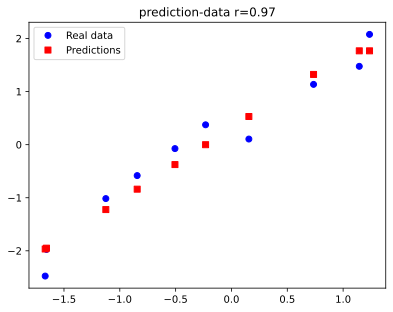

In [8]:
# plot the data
plt.plot(x,y,'bo', label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()